In [ ]:
!pip install scipy
!pip install tqdm
!pip install yacs
!pip install Cython
!pip install matplotlib>=3.2.2
!pip install numpy>=1.18.5
!pip install opencv-python>=4.1.2
!pip install Pillow
!pip install PyYAML>=5.3
!pip install scipy>=1.4.1
!pip install tensorboardX
!pip install seaborn
!pip install prefetch_generator
!pip install imageio
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
#SEEN FROM STACKOVERFLOW

import cv2
import os

def extract_frames(video_path, output_folder):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Read and save alternative frames
    frame_count = 0
    while True:
        success, frame = video_capture.read()
        if not success:
            break

        # Save every alternative frame
        if frame_count % 2 == 0:
            frame_name = f"frame_{frame_count//2:04d}.jpg"
            frame_path = os.path.join('', frame_name)
            cv2.imwrite(frame_path, frame)

        frame_count += 1

    # Release the video capture object
    video_capture.release()

# Example usage
video_path = 'test.mp4'
output_folder = 'sample_data'
extract_frames(video_path, output_folder)

## Preprocessing frames to appropriate shapes ##

In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn.functional as F
from google.colab.patches import cv2_imshow

def load_frames(folder_path):
    frames = []
    for file_name in sorted(os.listdir()):
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            file_path = os.path.join(folder_path, file_name)
            frame = cv2.imread(file_path)
            frames.append(frame)
    return frames

# Example usage
output_folder = ''
frames = load_frames(output_folder)

# Convert frames to a numpy array
frames_array = np.array(frames)
test = []
# Process the first 20 frames
for i in range(len(frames_array)):
    # Convert the current frame to a PyTorch tensor
    current_frame_tensor = torch.from_numpy(frames_array[i])

    # Resize the current frame tensor to the desired size
    resized_tensor = F.interpolate(current_frame_tensor.permute(2, 0, 1).unsqueeze(0), size=(480, 480), mode='bilinear', align_corners=False)

    # Convert the resized tensor to Byte type
    resized_tensor = resized_tensor.float()

    # Convert the tensors back to NumPy arrays for displaying with cv2.imshow
    original_image = current_frame_tensor.numpy().astype(np.uint8)
    resized_image = resized_tensor.squeeze(0).permute(1, 2, 0).numpy().astype(np.uint8)

    test.append(resized_tensor)

In [ ]:
test[0].shape

torch.Size([1, 3, 480, 480])

In [ ]:
#SEEN FROM TORCH DOCUMENTATION
# Load the model outside the loop
model = torch.hub.load('hustvl/yolop', 'yolop', pretrained=True)
model.cuda()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/hustvl/yolop/zipball/main" to /root/.cache/torch/hub/main.zip


MCnet(
  (model): Sequential(
    (0): Focus(
      (conv): Conv(
        (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): Hardswish()
      )
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): Hardswish()
    )
    (2): BottleneckCSP(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): Hardswish()
      )
      (cv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (cv3): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (cv4): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), st

In [ ]:
len(test[0])

1

In [ ]:
# Run the model on all the frames
masks = []
for i in range(len(test)):
      resized_tensor = test[i].cuda()
      det_out, da_seg_out, ll_seg_out = model(resized_tensor)
      masks.append(da_seg_out.cpu().detach())
      print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
len(test)

446

## Make the drivable area mask binary ##

In [ ]:
print(da_seg_out)

tensor([[[[0.9999, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9999],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.4242, 0.4280, 0.4350,  ..., 1.0000, 1.0000, 1.0000],
          [0.4219, 0.4278, 0.4420,  ..., 1.0000, 1.0000, 1.0000],
          [0.4074, 0.4387, 0.4431,  ..., 1.0000, 1.0000, 0.9998]],

         [[0.4120, 0.4109, 0.4109,  ..., 0.4106, 0.4107, 0.4116],
          [0.4109, 0.4117, 0.4118,  ..., 0.4116, 0.4118, 0.4112],
          [0.4106, 0.4112, 0.4112,  ..., 0.4111, 0.4113, 0.4109],
          ...,
          [0.5607, 0.5983, 0.5042,  ..., 0.4110, 0.4112, 0.4105],
          [0.4704, 0.4872, 0.4669,  ..., 0.4114, 0.4115, 0.4108],
          [0.4507, 0.4495, 0.4433,  ..., 0.4105, 0.4108, 0.4139]]]],
       device='cuda:0', grad_fn=<SigmoidBackward0>)


torch.Size([1, 2, 480, 480])
(480, 480)


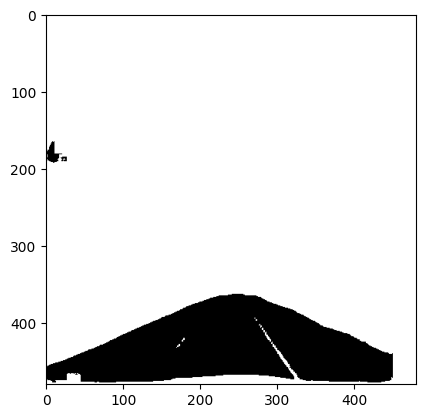

In [ ]:
import matplotlib.pyplot as plt

threshold = 0.5
binary_mask = torch.where(masks[400] > threshold, torch.tensor(1.0), torch.tensor(0.0))
print(binary_mask.shape)
# Select the first channel
binary_mask_channel = binary_mask[0, 0, :, :]

# Convert the tensor to numpy array
binary_mask_np = binary_mask_channel.detach().numpy()
print(binary_mask_np.shape)
# Plot the binary mask
plt.imshow(binary_mask_np, cmap='gray')
plt.show()

## Original Image for comparison ##

In [ ]:
# Convert the current frame to a PyTorch tensor
current_frame_tensor = torch.from_numpy(frames_array[400])

# Resize the current frame tensor to the desired size
resized_tensor = F.interpolate(current_frame_tensor.permute(2, 0, 1).unsqueeze(0), size=(640, 640), mode='bilinear', align_corners=False)


# Convert the tensors back to NumPy arrays for displaying with cv2.imshow
original_image = current_frame_tensor.numpy().astype(np.uint8)
resized_image = resized_tensor.squeeze(0).permute(1, 2, 0).numpy().astype(np.uint8)


cv2_imshow(resized_image)

## Interpolating mask onto our video ##

In [ ]:
# import matplotlib.pyplot as plt
# import cv2
# import torch
# import torch.nn.functional as F
# import numpy as np

# threshold = 0.5

# tests_2 = []

# for i in range(len(masks)):

#   binary_mask = torch.where(masks[i] < threshold, torch.tensor(1.0), torch.tensor(0.0))
#   binary_mask_channel = binary_mask[0, 0, :, :]
#   binary_mask_np = binary_mask_channel.detach().numpy()

#   # Your code to resize the image
#   current_frame_tensor = torch.from_numpy(frames_array[i])
#   resized_tensor = F.interpolate(current_frame_tensor.permute(2, 0, 1).unsqueeze(0), size=(640, 640), mode='bilinear', align_corners=False)
#   original_image = current_frame_tensor.numpy().astype(np.uint8)
#   resized_image = resized_tensor.squeeze(0).permute(1, 2, 0).numpy().astype(np.uint8)

#   # Resize the binary mask to match the resized image
#   resized_binary_mask = cv2.resize(binary_mask_np, (resized_image.shape[1], resized_image.shape[0]))

#   # Create an RGBA image where the RGB channels contain the original image
#   # and the A channel contains the resized binary mask
#   overlay_image = np.zeros_like(resized_image, dtype=np.uint8)
#   overlay_image[:, :, :3] = resized_image
#   alpha_channel = (resized_binary_mask * 255).astype(np.uint8)
#   overlay_image = np.dstack((overlay_image, alpha_channel))

#   tests_2.append(overlay_image)


In [ ]:
tests_2_rgb = []

for i in range(len(masks)):

  # Create the binary mask
  binary_mask = torch.where(masks[i] < threshold, torch.tensor(1.0), torch.tensor(0.0))
  print(binary_mask.shape)
  binary_mask_channel = binary_mask[0, 0, :, :]
  print(binary_mask_channel.shape)
  binary_mask_np = binary_mask_channel.detach().numpy()
  print(binary_mask_np.shape)
  # Resize the image
  current_frame_tensor = torch.from_numpy(frames_array[i])
  resized_tensor = F.interpolate(current_frame_tensor.permute(2, 0, 1).unsqueeze(0), size=(640, 640), mode='bilinear', align_corners=False)
  resized_image = resized_tensor.squeeze(0).permute(1, 2, 0).numpy().astype(np.uint8)

  # Resize the binary mask to match the resized image
  resized_binary_mask = cv2.resize(binary_mask_np, (resized_image.shape[1], resized_image.shape[0]))

  # Create a red overlay with the same size as the resized image
  overlay = np.zeros_like(resized_image, dtype=np.uint8)
  overlay[:, :] = [255, 0, 0]  # Red color

  # Use the binary mask to control the transparency of the overlay
  transparent_overlay = cv2.bitwise_and(overlay, overlay, mask=resized_binary_mask.astype(np.uint8))

  # Add the original image and the transparent overlay together
  final_image = cv2.add(resized_image, transparent_overlay)

  tests_2_rgb.append(final_image)


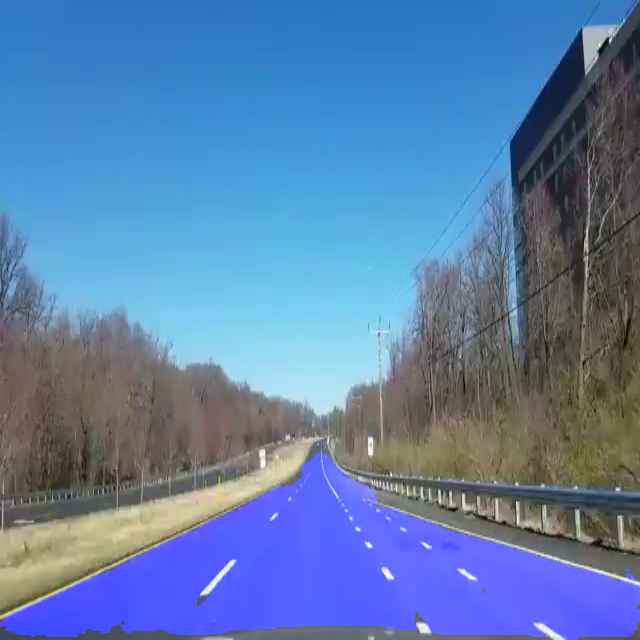

In [ ]:
cv2_imshow(tests_2_rgb[0])

## Convert overlayed video frames to .mp4 ##

In [ ]:
import cv2
import numpy as np

import cv2

# Get the dimensions of the images
height, width, _ = tests_2_rgb[0].shape

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter('final_vid_easy_final.mp4', fourcc, 15, (width, height))

# Write each image to the video file
for img in tests_2_rgb:
    video.write(img)

# Close the video file
video.release()